In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

from elementtree.ElementTree import Element, ElementTree, SubElement, dump, parse, tostring  
import collections
import math
from nltk import cluster
import numpy as np
import random
import matplotlib.axes as ax
import networkx as nx
import scipy as sp
import statistics as st
import matplotlib.pyplot as plt
import csv
import re
from itertools import groupby
from sklearn.feature_extraction import image
from sklearn.cluster import spectral_clustering, KMeans
from sklearn import metrics
from sklearn import preprocessing
import time
import SNF
import displayClusters
import affinityMatrix
import gc
from matplotlib.pyplot import imshow
from numpy import linalg as la
import sys
import gensim, logging
import pickle

class Dicts(object):
    def __init__(self, topics, tagdict=None, txtdict=None, vit_tagdict=None, w2v_model=None, imdict=None):
        self.topics = topics
        self.tagdict = tagdict
        self.txtdict = txtdict
        self.viterbi_tagdict = vit_tagdict
        self.word2vec_model = w2v_model
        self.imdict = imdict
        
from functions import *
        

In [2]:
# load word2vec model 
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

flickr_model = gensim.models.Word2Vec.load("flickr4m_skipgram.model")
print 'flickr word2vec model load complete..'

enwiki_model = gensim.models.Word2Vec.load("enwiki.w2v.model")
print 'enwiki word2vec model load complete..'

print flickr_model, enwiki_model

# Whole path set
paths = ["/home/soyeon1771/SNFtools/Div400/devset/devsetkeywords/",
         "/home/soyeon1771/SNFtools/Div400/devset/devsetkeywordsGPS/",
         "/home/soyeon1771/SNFtools/Div400/testset/testset_keywords/",
         "/home/soyeon1771/SNFtools/Div400/testset/testset_keywordsGPS/"]

# load dictionaries 

topics=[]
tagdict={}
nodes=[]
txtdict={}
imdict_HOG={}
imdict_VGG={}
imdict_Res152={}
imdict_LeNet={}

true_name = "trues.txt"
inters_name = "inters.txt"

try:
    os.remove("big.txt")
    os.remove(true_name)
    os.remove(inters_name)
except OSError:
    pass

for i in range(0, len(paths)):


    topics_ = read_topic(paths[i])
    topics.extend(topics_)
    print len(topics_)
    # tagdict['photo id'] = ['tag1', 'tag2', 'tag3', ...]
    tagdict_, nodes_ = get_tags_all(paths[i], topics_)
    tagdict.update(tagdict_)
    nodes.extend(nodes_)
    print len(tagdict_), len(nodes_)

    txtdict_ = get_textdescs_all(paths[i], topics_)
    txtdict.update(txtdict_)
    print len(txtdict_)


    get_bigtxt(paths[i], topics_)

    get_gt_inters(paths[i], topics_, nodes_, true_name, inters_name)

    imdict_HOG.update(get_imgdesc(paths[i], topics_, "HOG"))
    imdict_VGG.update(get_imgdesc(paths[i], topics_, "VGGnet"))
    imdict_Res152.update(get_imgdesc(paths[i], topics_, "Res152net-Caffe"))
    imdict_LeNet.update(get_imgdesc(paths[i], topics_, "LeNet"))

viterbi_segmented_tagdict = get_viterbi_tagdict(tagdict, nodes, 'big.txt')
print len(topics), len(tagdict), len(nodes), len(txtdict)
print len(imdict_HOG), len(imdict_VGG), len(imdict_Res152), len(imdict_LeNet)
print len(viterbi_segmented_tagdict)

flickr word2vec model load complete..
enwiki word2vec model load complete..
Word2Vec(vocab=544828, size=400, alpha=0.025) Word2Vec(vocab=2128959, size=400, alpha=0.025)
25
2281 2281
4325
2281
2281
2281
2281
2281
2281
2281
2281
25
2837 2837
4275
2837
2837
2837
2837
2837
2837
2837
2837
132
13155 13220
19484
13220
13155
13220
13155
13220
13155
13220
13155
210
24407 24607
24308
24607
24407
24607
24407
24607
24407
24607
24407
392 42479 42945 41001
42479 42479 42479 42479
42479


In [58]:
inter_nodes = np.loadtxt('inters_3789.txt', dtype=np.dtype(str))
#inter_nodes_sub20 = np.loadtxt('inters_sub20_whole.txt', dtype=np.dtype(str))
#print 'photo ids ***********************'

trues = np.loadtxt('trues_3789.txt')
#trues_sub20 = np.loadtxt('trues_sub20_whole.txt')
#print 'true labels ******************'
print len(inter_nodes), len(trues)
#print len(inter_nodes_sub20), len(trues_sub20)

3789 3789


In [15]:
for dir in os.listdir(paths[0]+'img/'):
    for file in os.listdir(paths[0]+'img/'+dir):
        print file.split('.jpg',1)[0],',', dir
        

6055125725 , Trento Cathedral
214098967 , Trento Cathedral
5004381056 , Trento Cathedral
349577230 , Trento Cathedral
3411870792 , Trento Cathedral
6055126157 , Trento Cathedral
33740121 , Trento Cathedral
6055674668 , Trento Cathedral
8395875019 , Trento Cathedral
6055125959 , Trento Cathedral
212998442 , Trento Cathedral
6055125647 , Trento Cathedral
4602025720 , Trento Cathedral
6055675334 , Trento Cathedral
321559803 , Trento Cathedral
2806167129 , Trento Cathedral
214076516 , Trento Cathedral
8395876655 , Trento Cathedral
6055126309 , Trento Cathedral
8396959750 , Trento Cathedral
2807015698 , Trento Cathedral
43755049 , Trento Cathedral
6927217801 , Trento Cathedral
6055674852 , Trento Cathedral
4843716472 , Trento Cathedral
6155342431 , Trento Cathedral
2807015536 , Trento Cathedral
6055675060 , Trento Cathedral
3125050953 , Trento Cathedral
240778165 , Trento Cathedral
10918904 , Trento Cathedral
3849268410 , Trento Cathedral
6155381339 , Trento Cathedral
6164090356 , Trento Ca

Abbey of Saint Gall


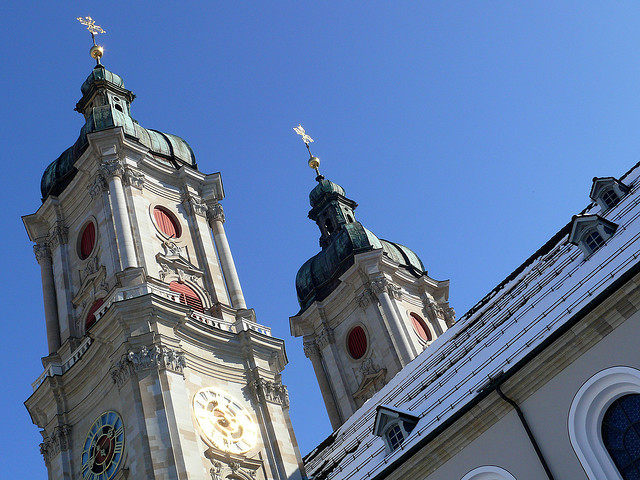

['stgallen', 'switzerland', 'appenzell', 'alps', 'abbeyofsaintgall', 'unesco', 'cultural', 'world', 'heritage', 'site', 'gallus', 'baroque', 'benedictine']
[['st', 'gallen'], ['switzerland'], ['app', 'en', 'z', 'el', 'l'], ['al', 'ps'], ['abbey', 'of', 'saint', 'gall'], ['unesco'], ['cultural'], ['world'], ['heritage'], ['site'], ['gallus'], ['baroque'], ['ben', 'edict', 'ine']]
Aachen Cathedral


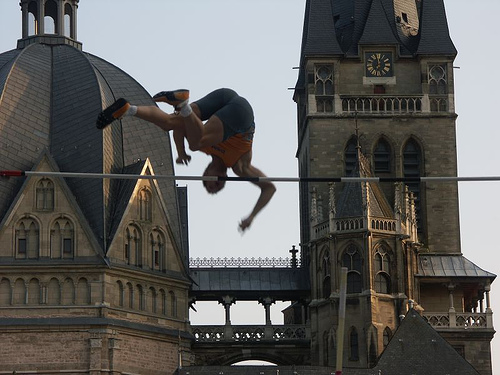

['polevault', 'katschhof', 'cathedral', 'aachen']
[['pole', 'vault'], ['katschhof'], ['cathedral'], ['aachen']]


IndexError: list index out of range

In [59]:
pid0='3338743092'
pid00='135870773'
pid1='49064819'
pid2='8069909'
pid3='249859943'


#pid0=inter_nodes_sub20[20]
#pid1=inter_nodes_sub20[10]

display_image(paths[0], pid0)
print tagdict[pid0]
print viterbi_segmented_tagdict[pid0]
#print viterbi_segmented_tagdict_flickr[pid0]
#print viterbi_segmented_tagdict_enwiki[pid0]

display_image(paths[1], pid1)
print tagdict[pid1]
print viterbi_segmented_tagdict[pid1]
#print viterbi_segmented_tagdict_flickr[pid1]
#print viterbi_segmented_tagdict_enwiki[pid1]

display_image(paths[2], pid2)
print tagdict[pid2]
print viterbi_segmented_tagdict[pid2]

display_image(paths[3], pid3)
print tagdict[pid3]
print viterbi_segmented_tagdict[pid3]

            

In [61]:
###############################
# Image descriptor dictionary
###############################

dicts_HOG = Dicts(topics=topics, imdict=imdict_HOG)
start = time.time()
print tag_similarity(pid0, pid1, dicts_HOG, 'img'), time.time()-start

dicts_VGG = Dicts(topics=topics, imdict=imdict_VGG)
start = time.time()
print tag_similarity(pid0, pid1, dicts_VGG, 'img'), time.time()-start

#dicts_Res50 = Dicts(topics, tagdict, txtdict, viterbi_segmented_tagdict, flickr_model, imdict_Res50)
#print tag_similarity(pid0, pid1, dicts_Res50, 'img')

dicts_Res152 = Dicts(topics=topics, imdict=imdict_Res152)
start = time.time()
print tag_similarity(pid0, pid1, dicts_Res152, 'img'), time.time()-start

dicts_LeNet = Dicts(topics=topics, imdict=imdict_LeNet)
start = time.time()
print tag_similarity(pid0, pid1, dicts_LeNet, 'img'), time.time()-start

[[ 0.86759263]] 0.000606060028076
[[ 0.58306006]] 0.000632047653198
[[ 0.64305892]] 0.000481843948364
[[ 0.53511524]] 0.000404119491577


In [62]:
###############################
# word2vec descriptor dictionary
###############################

dicts_flickr = Dicts(topics, tagdict, txtdict, viterbi_segmented_tagdict, flickr_model)
start = time.time()
print tag_similarity(pid0, pid1, dicts_flickr, 'word2vec'), time.time()-start

dicts_enwiki = Dicts(topics, tagdict, txtdict, viterbi_segmented_tagdict, enwiki_model)
start = time.time()
print tag_similarity(pid0, pid1, dicts_enwiki, 'word2vec'), time.time()-start

0.559082833858 0.0348079204559
0.498928889641 0.0296578407288


In [63]:
###############################
# Textual descriptor dictionary
###############################

dicts = Dicts(topics, tagdict, txtdict, viterbi_segmented_tagdict)
start = time.time()
print tag_similarity(pid0, pid1, dicts, 'wjaccard_vit'), time.time()-start

0.0 0.000349998474121


In [64]:
adj_imHOG = make_graph(dicts_HOG, inter_nodes, 'img', '0')
print 'make HOG image graph done (whole)', adj_imHOG.shape

adj_imVGG = make_graph(dicts_VGG, inter_nodes, 'img', '0')
print 'make VGGnet image graph done (whole)', adj_imVGG.shape

adj_imRes152 = make_graph(dicts_Res152, inter_nodes, 'img', '0')
print 'make Resnet image graph done (whole)', adj_imRes152.shape

adj_imLeNet = make_graph(dicts_LeNet, inter_nodes, 'img', '0')
print 'make Lenet image graph done (whole)', adj_imLeNet.shape

adj_jvit = make_graph(dicts, inter_nodes, 'wjaccard_vit', '0')
print 'make vjaccard text graph done (whole)', adj_jvit.shape

adj_flickr = make_graph(dicts_flickr, inter_nodes, 'word2vec', '0')
print 'make flickr word2vec flickr text graph done (whole)', adj_flickr.shape

adj_enwiki = make_graph(dicts_enwiki, inter_nodes, 'word2vec', '0')
print 'make enwiki word2vec enwiki text graph done (whole)', adj_enwiki.shape

img
1275.21200514
make HOG image graph done (whole) (3789, 3789)
img
4408.39479184
make VGGnet image graph done (whole) (3789, 3789)
img
2816.13664913
make Resnet image graph done (whole) (3789, 3789)
img
1852.02445102
make Lenet image graph done (whole) (3789, 3789)
wjaccard_vit
1382.62244797
make vjaccard text graph done (whole) (3789, 3789)
word2vec
1439.34292102
make flickr word2vec flickr text graph done (whole) (3789, 3789)
word2vec
1231.96928
make enwiki word2vec enwiki text graph done (whole) (3789, 3789)


0.000738006243693 1.0


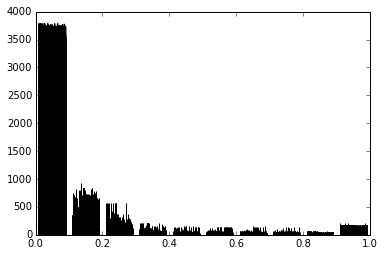

In [65]:
adj_jvit = preprocessing.MinMaxScaler().fit_transform(adj_jvit)
plt.hist(adj_jvit)
print np.min(adj_jvit[np.nonzero(adj_jvit)]), np.max(adj_jvit[np.nonzero(adj_jvit)])
np.savetxt('Graphs/adj_socialtfidf_jaccardvit_3789.txt', np.nan_to_num(adj_jvit))

2.28768412505e-07 1.0


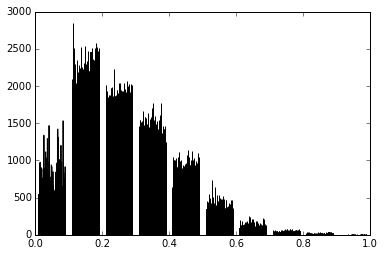

In [66]:
adj_imRes152 = preprocessing.MinMaxScaler().fit_transform(adj_imRes152)
plt.hist(adj_imRes152)
print np.min(adj_imRes152[np.nonzero(adj_imRes152)]), np.max(adj_imRes152[np.nonzero(adj_imRes152)])
np.savetxt('Graphs/adj_Res152-Caffe_cosine_3789.txt', np.nan_to_num(adj_imRes152))

2.20405547013e-06 1.0


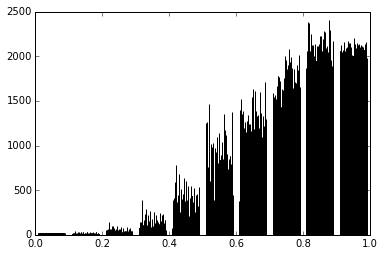

In [67]:
adj_imHOG = preprocessing.MinMaxScaler().fit_transform(adj_imHOG)
plt.hist(adj_imHOG)
print np.min(adj_imHOG[np.nonzero(adj_imHOG)]), np.max(adj_imHOG[np.nonzero(adj_imHOG)])
np.savetxt('Graphs/adj_HOG_cosine_3789.txt', np.nan_to_num(adj_imHOG))

2.36794910263e-07 1.0


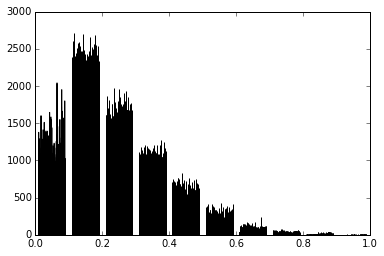

In [72]:
adj_imLeNet = preprocessing.MinMaxScaler().fit_transform(adj_imLeNet)
plt.hist(adj_imLeNet)
print np.min(adj_imLeNet[np.nonzero(adj_imLeNet)]), np.max(adj_imLeNet[np.nonzero(adj_imLeNet)])
np.savetxt('Graphs/adj_LeNet_cosine_3789.txt', np.nan_to_num(adj_imLeNet))

1.22699321717e-06 1.0


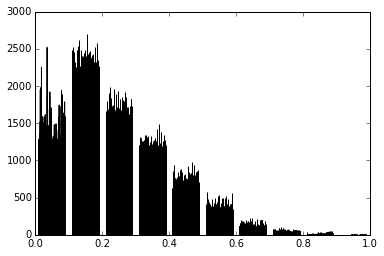

In [69]:
adj_imVGG = preprocessing.MinMaxScaler().fit_transform(adj_imVGG)
plt.hist(adj_imVGG)
print np.min(adj_imVGG[np.nonzero(adj_imVGG)]), np.max(adj_imVGG[np.nonzero(adj_imVGG)])
np.savetxt('Graphs/adj_VGG_cosine_3789.txt', np.nan_to_num(adj_imVGG))

0.000247244664146 1.0


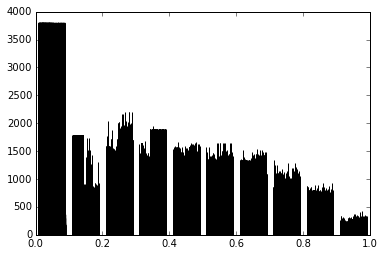

In [70]:
adj_flickr[np.nonzero(adj_flickr)] = preprocessing.MinMaxScaler().fit_transform(adj_flickr[np.nonzero(adj_flickr)])
plt.hist(adj_flickr)
print np.min(adj_flickr[np.nonzero(adj_flickr)]), np.max(adj_flickr[np.nonzero(adj_flickr)])
np.savetxt('Graphs/adj_word2vec_vflickr_3789.txt', np.nan_to_num(adj_flickr))

0.00242928388831 1.0


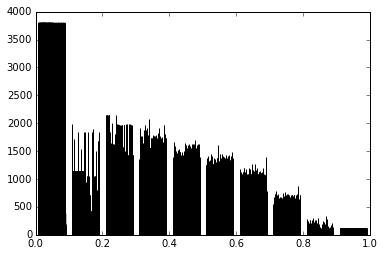

In [71]:
adj_enwiki[np.nonzero(adj_enwiki)] = preprocessing.MinMaxScaler().fit_transform(adj_enwiki[np.nonzero(adj_enwiki)])
plt.hist(adj_enwiki)
print np.min(adj_enwiki[np.nonzero(adj_enwiki)]), np.max(adj_enwiki[np.nonzero(adj_enwiki)])
np.savetxt('Graphs/adj_word2vec_venwiki_3789.txt', np.nan_to_num(adj_enwiki))

time of displayClusters 0.818706989288


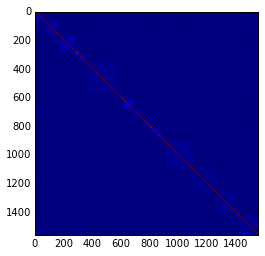

In [6]:
P = np.loadtxt('/home/soyeon1771/test_fused.txt')
P_idx = np.loadtxt('/home/soyeon1771/test_fused_label.txt')
start = time.time()
disp_W, index = displayClusters.displayClusters(P, P_idx)
print 'time of displayClusters', time.time()-start